# Clustering

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kneed as kn

In [3]:
#scaling, normalization
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#kmeans, dbscan, hierarchical (sklearn)
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
#evaluation
from sklearn.metrics import silhouette_score

#distance matrix (dbscan elbow, hierarchical)
from scipy.spatial.distance import pdist, squareform
from scipy.stats import pearsonr

# hierarchical (scipy)
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

from kneed import KneeLocator

In [4]:
from sklearn.metrics import *
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph

In [5]:
df = pd.read_csv('train_cleaned_v.1.csv')

In [6]:
df.head()

,originalTitle,rating,startYear,endYear,runtimeMinutes,awardWins,numVotes,worstRating,bestRating,totalImages,...,AwNmExWins,canHaveEpisodes,isRatable,isAdult,numRegions,userReviewsTotal,ratingCount,countryOfOrigin,genres,ratingMean
0,Neogenic Nightmare Chapter 3: Hydro-Man,"(7, 8]",1995,NaN,40,0.0,779,1,10,1,...,0,False,True,False,1,0,781,['US'],"Action,Adventure,Animation",7.5
1,Looping,"(5, 6]",1982,NaN,28,0.0,11,1,10,1,...,0,False,True,False,1,0,11,['XWG'],Action,5.5
2,Idealnaya para,"(5, 6]",1992,NaN,92,0.0,38,1,10,1,...,0,False,True,False,1,1,38,['RU'],Comedy,5.5
3,MasterChef Celebrity México,"(5, 6]",2021,NaN,53,0.0,15,1,10,22,...,0,True,True,False,1,0,15,['MX'],Reality-TV,5.5
4,Seutateueob,"(7, 8]",2020,2020.0,80,1.0,15718,1,10,347,...,1,True,True,False,32,452,15746,['KR'],"Comedy,Drama,Romance",7.5


#### Fill missing values and convert to numerical (where possible)

In [7]:
df.dtypes

originalTitle          object
rating                 object
startYear               int64
endYear               float64
runtimeMinutes          int64
awardWins             float64
numVotes                int64
worstRating             int64
bestRating              int64
totalImages             int64
totalVideos             int64
totalCredits            int64
criticReviewsTotal      int64
titleType              object
AwNmExWins              int64
canHaveEpisodes          bool
isRatable                bool
isAdult                  bool
numRegions              int64
userReviewsTotal        int64
ratingCount             int64
countryOfOrigin        object
genres                 object
ratingMean            float64
dtype: object

In [8]:
del df['originalTitle']
del df['rating']
del df['titleType']
del df['countryOfOrigin']
del df['genres']
del df['isAdult']
del df['isRatable']
del df['canHaveEpisodes']

In [9]:
del df['endYear']
del df['awardWins'] #HA DEI VALORI MANCANTI, VEDIAMO COSA FARNE

In [10]:
df.head()

,startYear,runtimeMinutes,numVotes,worstRating,bestRating,totalImages,totalVideos,totalCredits,criticReviewsTotal,AwNmExWins,numRegions,userReviewsTotal,ratingCount,ratingMean
0,1995,40,779,1,10,1,0,21,1,0,1,0,781,7.5
1,1982,28,11,1,10,1,0,1,0,0,1,0,11,5.5
2,1992,92,38,1,10,1,0,24,0,0,1,1,38,5.5
3,2021,53,15,1,10,22,0,56,0,0,1,0,15,5.5
4,2020,80,15718,1,10,347,2,47,4,1,32,452,15746,7.5


In [11]:
scaler = MinMaxScaler()
train_data = scaler.fit_transform(df)


In [12]:
%%time
sse_list = []
sil_list = []
k_values = range(2, 51)

for k in k_values:
    kmeans = KMeans(init='k-means++', n_clusters=k, n_init=10, max_iter=100)
    kmeans.fit(train_data)
    sse_list.append(kmeans.inertia_)
    sil_list.append(silhouette_score(train_data, kmeans.labels_))

kn = KneeLocator(k_values, sse_list, curve='convex', direction='decreasing')
elbow_k = kn.elbow
print("Numero ottimale di cluster (k) secondo il metodo del gomito:", elbow_k)

c:\Users\tomma\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\tomma\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


Numero ottimale di cluster (k) secondo il metodo del gomito: 12
CPU times: total: 6min 4s
Wall time: 3min 46s


316.6681129408732


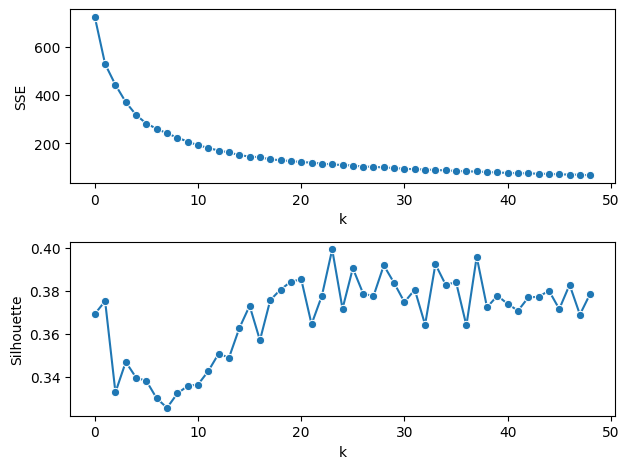

In [13]:

fig, axs = plt.subplots(2) # 1 row, 2 columns

sns.lineplot(x=range(len(sse_list)), y=sse_list, marker='o', ax=axs[0])
axs[0].set(xlabel='k', ylabel='SSE')
sns.lineplot(x=range(len(sil_list)), y=sil_list, marker='o', ax=axs[1])
axs[1].set(xlabel='k', ylabel='Silhouette')

plt.tight_layout() # Adjust the padding between and around subplots

print(sse_list[4]) #PUNTO IN CUI MI SEMBRA CI SIA IL GOMITO CHE CORRISPONDE A K = 6

In [30]:
kmeans = KMeans(init='k-means++', n_clusters=5, n_init=10, max_iter=100)
kmeans.fit(train_data)

KMeans(max_iter=100, n_clusters=5, n_init=10)

In [31]:
print('centroids', kmeans.cluster_centers_)
print('labels', np.unique(kmeans.labels_, return_counts=True))
print('sse', kmeans.inertia_)
print('silhouette', silhouette_score(train_data, kmeans.labels_))

centroids [[4.02947474e-01 1.86170831e-02 2.11609637e-04 0.00000000e+00
  0.00000000e+00 2.02209345e-03 1.21616691e-04 1.87169769e-03
  3.23015656e-03 2.65457752e-04 5.22609974e-02 8.12181855e-04
  2.11568349e-04 5.87578281e-01]
 [9.08358174e-01 1.73820757e-02 3.72724453e-04 0.00000000e+00
  0.00000000e+00 2.41537700e-03 9.47745631e-04 3.96389705e-03
  1.96639231e-03 2.67892576e-03 1.70786597e-02 3.74571086e-04
  3.72999242e-04 7.81659022e-01]
 [7.80302409e-01 3.16906188e-02 4.18901809e-02 0.00000000e+00
  0.00000000e+00 3.19264439e-02 1.54110384e-02 1.90717536e-02
  9.60555437e-02 3.85523370e-02 4.16343783e-01 2.66521262e-02
  4.18872545e-02 6.72876469e-01]
 [8.46352621e-01 2.39640092e-02 2.35942978e-04 0.00000000e+00
  0.00000000e+00 2.09795208e-03 8.09014244e-04 3.39593969e-03
  3.87012127e-03 1.53750068e-03 3.50891769e-02 6.60081851e-04
  2.35975575e-04 4.72867406e-01]
 [6.86365048e-01 2.03150416e-02 1.61702572e-04 0.00000000e+00
  0.00000000e+00 2.64990319e-03 1.16894303e-04 3.224

In [ ]:
n_points = train_data.shape[0]

#generate distance matrix
distance_matrix = squareform(pdist(train_data, metric='euclidean')) 

#Otteniamo le etichette di cluster dal modello k-means
labels = kmeans.labels_

#generate ideal similarity matrix
similarity_matrix = np.equal.outer(labels, labels).astype(int)


# Convertiamo la matrice delle distanze in una matrice di similarità
# (simply similarity_matrix = max_distance - distance_matrix)
max_distance = np.max(distance_matrix)
similarity_from_distance = distance_matrix - max_distance 

'''
PARTE CON LA MATRICE PRESA INTERAMENTE
MEGLIO PRENDERNE SOLO METà ALTRIMENTI IL PC NON CE LA FA PERCHÈ LE MATRICI SONO TROPPO GRANDI
SE NE PUò PRENDERE SOLO METà TANTO SONO MATRICI SIMMETRICHE

# Rendi entrambe le matrici 1D per il calcolo della correlazione
similarity_from_distance_flat = similarity_from_distance.flatten()
similarity_matrix_flat = similarity_matrix.flatten()


# Calcola la correlazione di Pearson
correlation, _ = pearsonr(similarity_from_distance_flat, similarity_matrix_flat)

print("Correlation between distance and ideal similarity matrices:", correlation)
'''
# Selezioniamo solo la parte inferiore della matrice, inclusa la diagonale
lower_triangle_indices = np.tril_indices(n_points)

# Appiattiamo solo la parte inferiore della matrice
similarity_from_distance_flat = similarity_from_distance[lower_triangle_indices]
similarity_matrix_flat = similarity_matrix[lower_triangle_indices]

# Calcolare la correlazione di Pearson tra i vettori appiattiti
correlation, _ = pearsonr(similarity_from_distance_flat, similarity_matrix_flat)

print("Correlation between distance and ideal similarity matrices:", correlation)


Correlation between distance and ideal similarity matrices: -0.41980798292705235


### Analysis by centroid-based methods

- K-Means (mandatory), Bisecting K-Means (optional), X-Means (optional);

- Choice the attributes, identify the best value of k, discuss the clusters.

### Analysis by density-based clustering

- DBSCAN (mandatory), OPTICS (optional);

- Choice the attributes, identify the best parameter configuration, discuss clusters.

### Analysis by hierarchical clustering

- Choice the attributes, the distance function, analyse several dendrograms.

### Final discussion

- Which is the best algorithm? Remember that best is studied w.r.t. several aggregate 
statistics, cluster distributions and w.r.t. the typology of algorithm used for that 
particular dataset;
